* We look at the maximum possession value for each team in every minute of the game so far (capped between zero and 0.1). <br>
* The threat of each team is then a combination of these values, weighted for how recently they occurred, with the most recent minutes having more influence on the final value. Only the most recent three to four minutes have significant impact here. <br>
* The momentum for a given minute then takes the difference between these values for each team to see who was more dominant. <br>

xT grid created by Jernej Fllsar at Twelve.

In [65]:
import soccerdata as sd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [5]:
ws = sd.WhoScored(leagues="ENG-Premier League", seasons='2022/2023')

[07/31/24 22:06:32] INFO     Saving cached data to C:\Users\Aleks\soccerdata\data\WhoScored          ]8;id=283254;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\_common.py\_common.py]8;;\:]8;id=895207;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\_common.py#263\263]8;;\

[07/31/24 22:06:34] INFO     patching driver executable                                              ]8;id=911798;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\undetected_chromedriver\patcher.py\patcher.py]8;;\:]8;id=237596;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\undetected_chromedriver\patcher.py#346\346]8;;\
                             C:\Users\Aleks\appdata\roaming\undetected_chromedriver\undetected_chrom               
                             edriver.exe                                                                           

In [6]:
schedule = ws.read_schedule()

[07/31/24 22:07:23] INFO     Retrieving calendar for ENG-Premier League 2223                       ]8;id=968245;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=849578;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#371\371]8;;\

[07/31/24 22:07:31] INFO     [1/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=757594;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=146213;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:07:38] INFO     [2/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=671128;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=282603;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:07:47] INFO     [3/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=117083;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=117600;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:07:55] INFO     [4/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=167120;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=834024;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:08:00] INFO     [5/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=969773;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=599119;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:08:10] INFO     [6/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=345694;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=50241;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:08:20] INFO     [7/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=851279;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=754889;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:08:28] INFO     [8/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=206962;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=478264;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:08:37] INFO     [9/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=261849;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=909455;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

[07/31/24 22:08:46] INFO     [10/10] Retrieving fixtures for ENG-Premier League 2223               ]8;id=279646;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=164208;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

In [15]:
schedule[(schedule['home_team']=='Brighton') & (schedule['away_team']=='West Ham')]

,,,stage_id,game_id,status,start_time,home_team_id,home_team,home_yellow_cards,home_red_cards,away_team_id,away_team,away_yellow_cards,away_red_cards,has_incidents_summary,has_preview,score_changed_at,elapsed,last_scorer,is_top_match,home_team_country_code,away_team_country_code,comment_count,is_lineup_confirmed,is_stream_available,match_is_opta,home_team_country_name,away_team_country_name,date,home_score,away_score,incidents,bets,aggregate_winner_field,winner_field,period,extra_result_field,home_extratime_score,away_extratime_score,home_penalty_score,away_penalty_score,started_at_utc,first_half_ended_at_utc,second_half_started_at_utc,stage
league,season,game,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ENG-Premier League,2223,2023-03-04 Brighton-West Ham,20934,1640881,6,2023-03-04T15:00:00,211,Brighton,0,0,29,West Ham,3,0,True,True,2023-03-04 16:52:17Z,FT,0.0,False,gb-eng,gb-eng,3,True,False,False,England,England,2023-03-04 15:00:00+00:00,4,0,"[{'minute': '18', 'type': 1, 'subType': 2, 'pl...",None,None,0.0,3,None,None,None,None,None,2023-03-04T15:00:14Z,2023-03-04T15:48:19Z,2023-03-04T16:03:42Z,None


In [16]:
match_id = 1640881

In [19]:
events = ws.read_events(match_id)

[07/31/24 22:12:08] INFO     Retrieving calendar for ENG-Premier League 2223                       ]8;id=626834;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=188950;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#371\371]8;;\

                    INFO     [1/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=433750;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=894225;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [2/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=794384;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=361181;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [3/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=177618;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=825257;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [4/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=486576;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=346268;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [5/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=578326;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=576817;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [6/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=654495;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=254628;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [7/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=407425;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=691753;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [8/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=376774;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=753038;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [9/10] Retrieving fixtures for ENG-Premier League 2223                ]8;id=519452;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=897494;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [10/10] Retrieving fixtures for ENG-Premier League 2223               ]8;id=683817;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=162744;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#400\400]8;;\

                    INFO     [1/1] Retrieving game with id=1640881                                 ]8;id=242371;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py\whoscored.py]8;;\:]8;id=529145;file://C:\Users\Aleks\AppData\Roaming\Python\Python310\site-packages\soccerdata\whoscored.py#692\692]8;;\

In [24]:
xT = pd.read_csv("https://raw.githubusercontent.com/AKapich/WorldCup_App/main/app/xT_Grid.csv", header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape 

In [33]:
events[events['end_x'].notna()]

type
Pass         1145
Clearance      25
Name: count, dtype: int64

In [28]:
events['type'].value_counts()

type
Pass               1145
BallRecovery         94
BallTouch            57
TakeOn               39
Tackle               31
Clearance            29
Aerial               28
Foul                 28
Challenge            20
CornerAwarded        20
Dispossessed         16
Interception         13
BlockedPass          13
SavedShot            12
Save                 12
SubstitutionOff       9
SubstitutionOn        9
KeeperPickup          8
MissedShots           7
End                   6
Start                 4
Goal                  4
Card                  3
FormationSet          2
ShieldBallOpp         2
PenaltyFaced          1
Claim                 1
FormationChange       1
Smother               1
Name: count, dtype: int64

In [37]:
def get_xT(type):
    df = events[events['type']==type][events['end_x'].notna()]

    df[f'start_x_bin'] = pd.cut(df['x'], bins=xT_cols, labels=False)
    df[f'start_y_bin'] = pd.cut(df['y'], bins=xT_rows, labels=False)
    df[f'end_x_bin'] = pd.cut(df['end_x'], bins=xT_cols, labels=False)
    df[f'end_y_bin'] = pd.cut(df['end_x'], bins=xT_rows, labels=False)
    df['start_zone_value'] = df[[f'start_x_bin', f'start_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)
    df['end_zone_value'] = df[[f'end_x_bin', f'end_y_bin']].apply(lambda z: xT[z[1]][z[0]], axis=1)
    df['xT'] = df['start_zone_value']-df['end_zone_value']

    return df[['xT', 'minute', 'second', 'team', 'type']]

xtdf = pd.concat([get_xT('Pass'), get_xT('Clearance')], axis=0)

In [45]:
xtdf['timestamp'] = xtdf['minute'] + xtdf['second']/60
xtdf = xtdf.sort_values('timestamp')

In [46]:
xtdf

xT  \
league             season game                         id                     
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895  0.003741   
                                                       2515069905  0.000219   
                                                       2515070017  0.001587   
                                                       2515070135  0.001628   
                                                       2515070175 -0.006068   
...                                                                     ...   
                                                       2515302087 -0.004505   
                                                       2515302169 -0.000619   
                                                       2515303185 -0.007485   
                                                       2515307891 -0.000479   
                                                       2515303811  0.001379   

                                                                   minute  \
league             season game                         id                   
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895       0   
                                                       2515069905       0   
                                                       2515070017       0   
                                                       2515070135       0   
                                                       2515070175       0   
...                                                                   ...   
                                                       2515302087      92   
                                                       2515302169      92   
                                                       2515303185      92   
                                                       2515307891      92   
                                                       2515303811      93   

                                                                   second  \
league             season game                         id                   
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895       0   
                                                       2515069905       2   
                                                       2515070017       6   
                                                       2515070135      11   
                                                       2515070175      19   
...                                                                   ...   
                                                       2515302087      13   
                                                       2515302169      14   
                                                       2515303185      47   
                                                       2515307891      50   
                                                       2515303811       7   

                                                                       team  \
league             season game                         id                     
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895  West Ham   
                                                       2515069905  West Ham   
                                                       2515070017  West Ham   
                                                       2515070135  West Ham   
                                                       2515070175  West Ham   
...                                                                     ...   
                                                       2515302087  Brighton   
                                                       2515302169  Brighton   
                                                       2515303185  West Ham   
                                                       2515307891  Brighton   
                                                       2515303811  Brighton   

             

In [90]:
home_team, away_team = 'West Ham', 'Brighton'
xtdf['momentum'] = 0

for idx, row in xtdf.iterrows():
    timestamp = row['timestamp']
    recent_events = xtdf[(xtdf['timestamp']<timestamp) & (xtdf['timestamp']>=timestamp-3)]
    momentum = (1 if row['team']==home_team else -1) * row['xT']
    for _, event in recent_events.iterrows():
        momentum += (1 if event['team']==home_team else -1) * event['xT'] * min(1/timestamp-event['timestamp'], 0.1)
    xtdf.loc[idx, 'momentum'] = momentum
    

In [91]:
xtdf

xT  \
league             season game                         id                     
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895  0.003741   
                                                       2515069905  0.000219   
                                                       2515070017  0.001587   
                                                       2515070135  0.001628   
                                                       2515070175 -0.006068   
...                                                                     ...   
                                                       2515302087 -0.004505   
                                                       2515302169 -0.000619   
                                                       2515303185 -0.007485   
                                                       2515307891 -0.000479   
                                                       2515303811  0.001379   

                                                                   minute  \
league             season game                         id                   
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895       0   
                                                       2515069905       0   
                                                       2515070017       0   
                                                       2515070135       0   
                                                       2515070175       0   
...                                                                   ...   
                                                       2515302087      92   
                                                       2515302169      92   
                                                       2515303185      92   
                                                       2515307891      92   
                                                       2515303811      93   

                                                                   second  \
league             season game                         id                   
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895       0   
                                                       2515069905       2   
                                                       2515070017       6   
                                                       2515070135      11   
                                                       2515070175      19   
...                                                                   ...   
                                                       2515302087      13   
                                                       2515302169      14   
                                                       2515303185      47   
                                                       2515307891      50   
                                                       2515303811       7   

                                                                       team  \
league             season game                         id                     
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895  West Ham   
                                                       2515069905  West Ham   
                                                       2515070017  West Ham   
                                                       2515070135  West Ham   
                                                       2515070175  West Ham   
...                                                                     ...   
                                                       2515302087  Brighton   
                                                       2515302169  Brighton   
                                                       2515303185  West Ham   
                                                       2515307891  Brighton   
                                                       2515303811  Brighton   

             

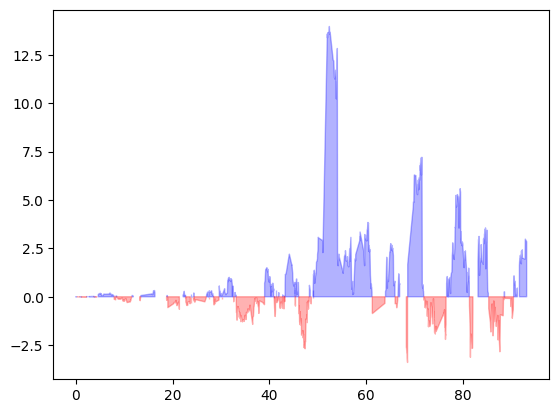

In [92]:
# plt.plot(xtdf['timestamp'], xtdf['momentum'], label='Momentum', color='b', lw=2)
plt.fill_between(xtdf['timestamp'], xtdf['momentum'], where=(xtdf['momentum'] > 0), color='blue', alpha=0.3)
plt.fill_between(xtdf['timestamp'], xtdf['momentum'], where=(xtdf['momentum'] < 0), color='red', alpha=0.3)

In [78]:
from scipy.ndimage import gaussian_filter1d

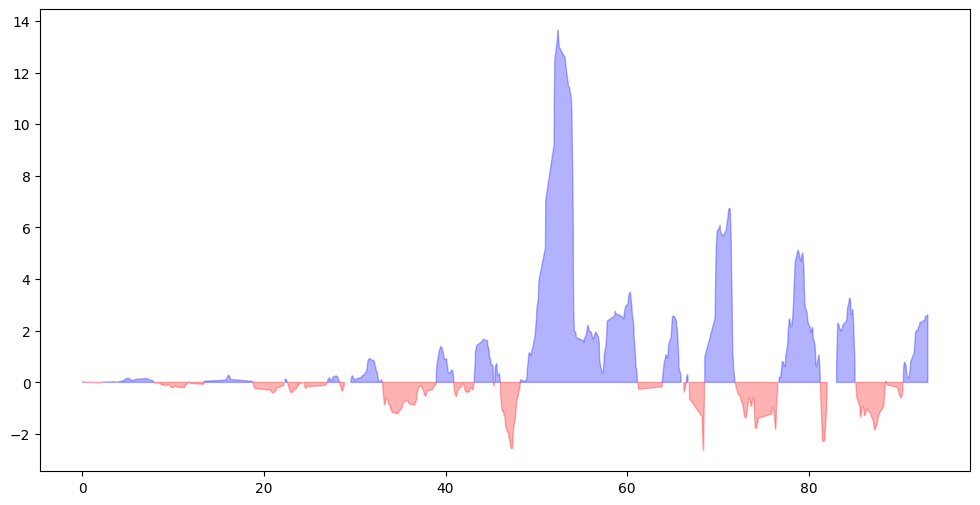

In [82]:
smoothed_momentum = gaussian_filter1d(xtdf['momentum'], sigma=2)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the filled areas for positive and negative momentum
plt.fill_between(xtdf['timestamp'], smoothed_momentum, where=(smoothed_momentum > 0), color='blue', alpha=0.3)
plt.fill_between(xtdf['timestamp'], smoothed_momentum, where=(smoothed_momentum < 0), color='red', alpha=0.3)



In [94]:
# Novel approach

In [97]:
xtdf

xT  \
league             season game                         id                     
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895  0.003741   
                                                       2515069905  0.000219   
                                                       2515070017  0.001587   
                                                       2515070135  0.001628   
                                                       2515070175 -0.006068   
...                                                                     ...   
                                                       2515302087 -0.004505   
                                                       2515302169 -0.000619   
                                                       2515303185 -0.007485   
                                                       2515307891 -0.000479   
                                                       2515303811  0.001379   

                                                                   minute  \
league             season game                         id                   
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895       0   
                                                       2515069905       0   
                                                       2515070017       0   
                                                       2515070135       0   
                                                       2515070175       0   
...                                                                   ...   
                                                       2515302087      92   
                                                       2515302169      92   
                                                       2515303185      92   
                                                       2515307891      92   
                                                       2515303811      93   

                                                                   second  \
league             season game                         id                   
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895       0   
                                                       2515069905       2   
                                                       2515070017       6   
                                                       2515070135      11   
                                                       2515070175      19   
...                                                                   ...   
                                                       2515302087      13   
                                                       2515302169      14   
                                                       2515303185      47   
                                                       2515307891      50   
                                                       2515303811       7   

                                                                       team  \
league             season game                         id                     
ENG-Premier League 2223   2023-03-04 Brighton-West Ham 2515069895  West Ham   
                                                       2515069905  West Ham   
                                                       2515070017  West Ham   
                                                       2515070135  West Ham   
                                                       2515070175  West Ham   
...                                                                     ...   
                                                       2515302087  Brighton   
                                                       2515302169  Brighton   
                                                       2515303185  West Ham   
                                                       2515307891  Brighton   
                                                       2515303811  Brighton   

             

In [98]:
from copy import deepcopy

In [99]:
xT_data = deepcopy(xtdf)

In [100]:
xT_data['xT_clipped'] = np.clip(xT_data['xT'], 0, 0.1)

In [106]:
max_xT_per_minute = xT_data.groupby(['team', 'minute'])['xT_clipped'].max().reset_index()
max_xT_per_minute

,team,minute,xT_clipped
0,Brighton,0,0.002154
1,Brighton,1,0.005318
2,Brighton,2,0.003041
3,Brighton,3,0.002477
4,Brighton,4,0.004722
...,...,...,...
153,West Ham,87,0.000219
154,West Ham,89,0.003741
155,West Ham,90,0.003394
156,West Ham,91,0.001587


In [119]:
minutes = sorted(xT_data['minute'].unique())

# Initialize dictionaries to store weighted xT sums and momentum values
weighted_xT_sum = {team: [] for team in max_xT_per_minute['team'].unique()}
momentum = []

In [120]:
window_size = 4
decay_rate = 0.25

for i, current_minute in enumerate(minutes):
    for team in weighted_xT_sum:
        # Get the xT values for the most recent window_size minutes for this team
        recent_xT_values = max_xT_per_minute[(max_xT_per_minute['team'] == team) & 
                                                (max_xT_per_minute['minute'] <= current_minute) & 
                                                (max_xT_per_minute['minute'] > current_minute - window_size)]
        
        # Calculate the time decay weights (most recent minutes have more weight)
        weights = np.exp(-decay_rate * (current_minute - recent_xT_values['minute'].values))
        
        # Calculate the weighted sum of xT values
        weighted_sum = np.sum(weights * recent_xT_values['xT_clipped'].values)
        
        # Append the weighted sum to the corresponding team's list
        weighted_xT_sum[team].append(weighted_sum)

    # Calculate the momentum for the current minute as the difference between the two teams' weighted xT sums
    momentum.append(weighted_xT_sum['Brighton'][-1] - weighted_xT_sum['West Ham'][-1])

In [123]:
momentum_df = pd.DataFrame({
    'minute': minutes,
    'momentum': momentum
})

In [126]:
from scipy.ndimage import gaussian_filter1d

# Function to smooth momentum data using moving average
def smooth_momentum_moving_average(momentum_df, window_size=3):
    momentum_df['smoothed_momentum'] = momentum_df['momentum'].rolling(window=window_size, center=True).mean()
    return momentum_df

# Function to smooth momentum data using Gaussian filter
def smooth_momentum_gaussian(momentum_df, sigma=1):
    momentum_df['smoothed_momentum'] = gaussian_filter1d(momentum_df['momentum'], sigma=sigma)
    return momentum_df

In [182]:
def plot_momentum(momentum_df, smoothed=False, smoothing_method='gaussian', **kwargs):
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.set_facecolor('#0e1117')
    # ax.plot(momentum_df['minute'], momentum_df['momentum'], label='Raw Momentum', alpha=0.5, color='gray')
    ax.set_facecolor('#0e1117')

    if smoothed:
        if smoothing_method == 'moving_average':
            smoothed_df = smooth_momentum_moving_average(momentum_df, window_size=kwargs.get('window_size', 3))
        elif smoothing_method == 'gaussian':
            smoothed_df = smooth_momentum_gaussian(momentum_df, sigma=kwargs.get('sigma', 1))
        ax.plot(smoothed_df['minute'], smoothed_df['smoothed_momentum'], label='Smoothed Momentum', color='black')

    ax.fill_between(smoothed_df['minute'], smoothed_df['smoothed_momentum'], where=(smoothed_df['smoothed_momentum'] > 0), color='blue', alpha=0.5)
    ax.fill_between(smoothed_df['minute'], smoothed_df['smoothed_momentum'], where=(smoothed_df['smoothed_momentum'] < 0), color='red', alpha=0.5)   
    
    ax.axhline(0, color='white', linestyle='--', linewidth=0.5)
    ax.set_xlabel('Minute', color='white', fontsize=15, fontweight='bold', fontfamily='Monospace')
    ax.set_ylabel('Momentum', color='white', fontsize=15, fontweight='bold', fontfamily='Monospace')
    ax.set_title('Match xT Momentum', color='white', fontsize=20, fontweight='bold', fontfamily='Monospace', pad=-5)
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    for spine in ['top', 'right', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.margins(x=0)
    ax.set_xticks([0,15,30,45,60,75,90])
    # plt.legend()
    plt.show()

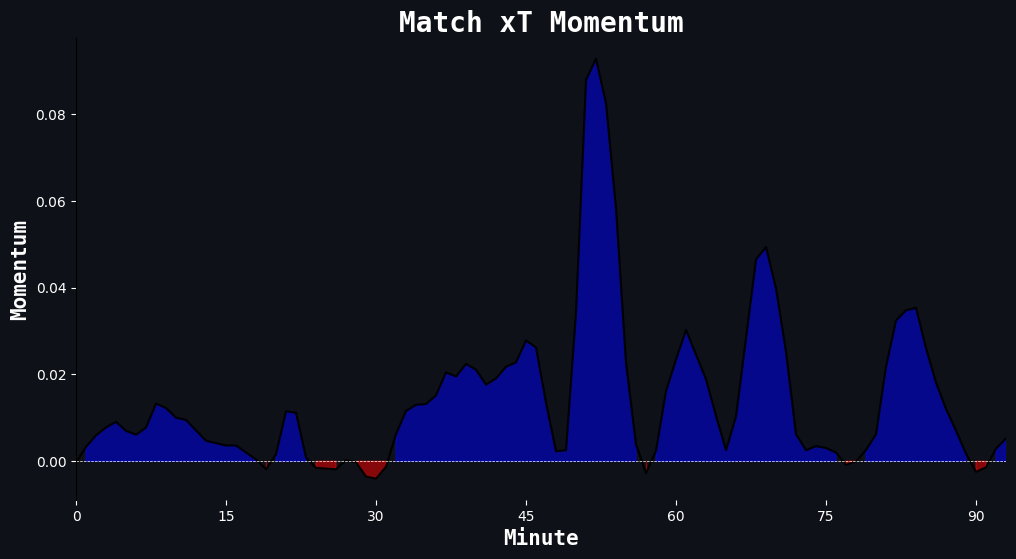

In [183]:
plot_momentum(momentum_df, smoothed=True, smoothing_method='gaussian', sigma=0.7)